In [ ]:
from google.colab import files
uploaded = files.upload()

Saving employe.csv to employe.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv("employe.csv")

In [ ]:
data.head(15)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0


In [ ]:
data = data.dropna()



In [ ]:
data.rename(columns=lambda x: x.strip().lower(), inplace=True)

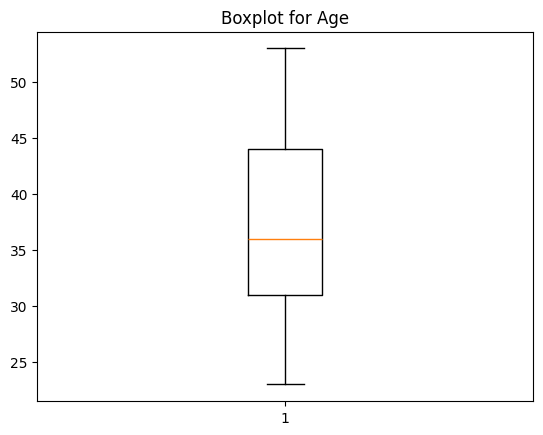

In [ ]:
plt.boxplot(data['age'])
plt.title("Boxplot for Age")
plt.show()

In [ ]:
data = data[(data['age'] >= 17) & (data['age'] <= 75)]

In [ ]:
encoder = LabelEncoder()
data['gender'] = encoder.fit_transform(data['gender'])
data['education level'] = encoder.fit_transform(data['education level'])
data['job title'] = encoder.fit_transform(data['job title'])

In [ ]:
def convert_salary(salary):
    if salary < 50000:
        return 'Low'
    elif salary < 100000:
        return 'Medium'
    else:
        return 'High'

data['salary_range'] = data['salary'].apply(convert_salary)


In [ ]:
X = data.drop(columns=['salary', 'salary_range'])
Y = data['salary_range']

In [ ]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [ ]:
df = pd.concat([X, Y], axis=1)
df = df[df['salary_range'].map(df['salary_range'].value_counts()) >= 2]
X = df.drop(columns='salary_range')
Y = df['salary_range']

In [ ]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("✅ Accuracy:", round(accuracy * 100, 2), "%")
print("🔍 First 10 Predictions:", y_pred[:10])

✅ Accuracy: 46.67 %
🔍 First 10 Predictions: ['High' 'High' 'High' 'Low' 'High' 'Low' 'High' 'High' 'Low' 'Medium']


In [ ]:
print(Y.value_counts())


salary_range
High      176
Medium    133
Low        64
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

imputer = SimpleImputer(strategy='most_frequent')
X_imputed = imputer.fit_transform(X)  # X should be your feature matrix
X = pd.DataFrame(X_imputed, columns=X.columns)


sm = SMOTE(random_state=42)
X_res, Y_res = sm.fit_resample(X, Y)


x_train, x_test, y_train, y_test = train_test_split(
    X_res, Y_res, test_size=0.2, stratify=Y_res, random_state=42
)


model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("✅ Accuracy after SMOTE:", round(accuracy * 100, 2), "%")
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))



✅ Accuracy after SMOTE: 73.58 %

📊 Classification Report:
               precision    recall  f1-score   support

        High       0.69      0.69      0.69        35
         Low       0.84      0.77      0.81        35
      Medium       0.69      0.75      0.72        36

    accuracy                           0.74       106
   macro avg       0.74      0.74      0.74       106
weighted avg       0.74      0.74      0.74       106



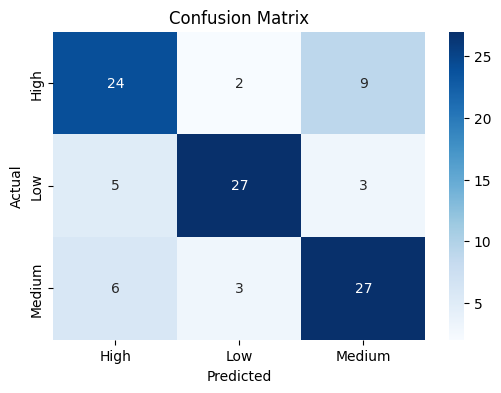

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



/tmp/ipython-input-31-1540885892.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


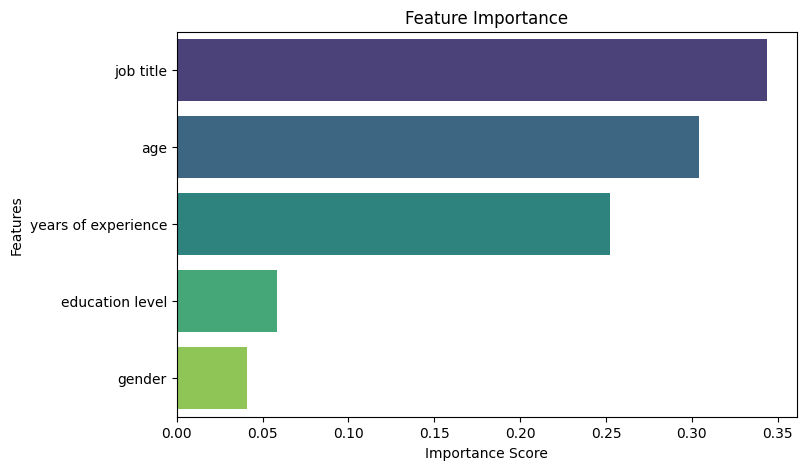

In [ ]:
# Feature Importance using RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Feature names
feature_names = X.columns

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort values
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()



In [ ]:
# Save cleaned and resampled dataset
df_final = pd.concat([pd.DataFrame(X_res, columns=X.columns), Y_res.reset_index(drop=True)], axis=1)
df_final.to_csv("final_processed_data.csv", index=False)
print("✅ Cleaned & resampled dataset exported successfully!")


✅ Cleaned & resampled dataset exported successfully!


In [ ]:
# Create prediction DataFrame
prediction_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
prediction_df.to_csv("salary_predictions.csv", index=False)
print("✅ Predictions exported successfully!")


✅ Predictions exported successfully!
